In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Sample\randomwalk-ds-assessment\books.csv")

In [3]:
dataset.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


## dataset.info() gives the information about rows and columns

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

## 1. This also gives true information about rows and columns

In [10]:
dataset.shape

(399, 24)

## 2. This tells How many books do not have an original title?

In [14]:
books_without_original_title = dataset['original_title'].isnull().sum()
print(f'{books_without_original_title}')

36


## 3. How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [15]:
dataset_clean = dataset.dropna(subset=['original_title'])
unique_books_count = dataset['book_id'].nunique()
print(f'{len(dataset_clean)}')

363


## 4. What is the average rating of all the books in the dataset based on ‘average_rating’?

In [23]:
average_rating = dataset['average_rating'].mean()
print(f' average rating: {average_rating}')

 average rating: 3.9837844611528817


##  5. Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [22]:
books_published_in_2000 = dataset[dataset['original_publication_year']==2000]
num_books_published_in_2000 = len(books_published_in_2000)
print(f'books published in 2000 : {num_books_published_in_2000}')

books published in 2000 : 8


## 6.  Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [28]:
max_ratings_row = dataset.loc[dataset['work_ratings_count'].idxmax()]
book_with_max_ratings_title = max_ratings_row['title']
print(f'{book_with_max_ratings_title}')

The Diary of a Young Girl


## 7. Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

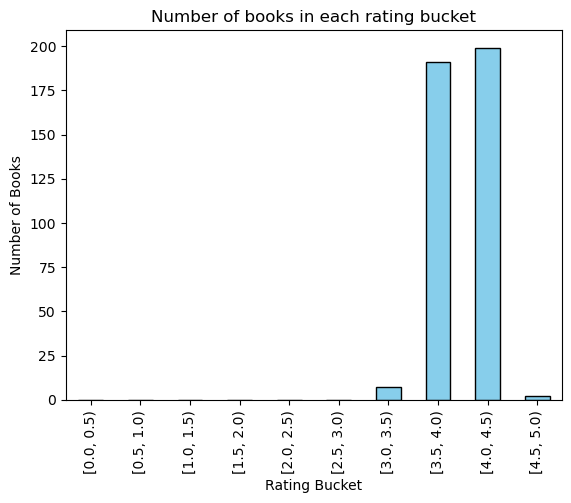

In [30]:
ratings_bucket = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
dataset['ratings_bucket'] = pd.cut(dataset['average_rating'], bins = ratings_bucket, right=False)
rating_counts = dataset.groupby('ratings_bucket').size()
rating_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of books in each rating bucket')
plt.show()

In [31]:
## Thank You